In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import set_config

set_config(transform_output="pandas")
pd.set_option("display.max_columns", None)


# Data

In [2]:
train = pd.read_parquet("../data/raw/train_data.parquet")
test = pd.read_parquet("../data/raw/submission_data.parquet")
train.sample(5)


,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
2188947,PEPBY,0.025853,Narnia,4.0,4.0,0.750000,H,0.567780,0.0,2.0,3,4,4,5,4,2021-04-23,15,5,0.018980,HOSPITAL
1344995,PEPBY,0.027881,Essos,2.0,4.0,0.190476,H,0.051177,0.0,0.0,4,4,4,4,5,2016-04-06,4,17,0.008530,RETAIL
3070704,FNHPF,0.001535,Wakanda,0.0,3.0,0.714286,NaN,NaN,2.0,0.0,4,5,5,4,3,2016-03-21,15,6,0.019441,NaN
3316471,HHBXR,0.000000,Yunkai,3.0,9.0,0.409091,M,1.000000,0.0,0.0,5,4,4,4,4,2013-09-12,9,13,0.023059,HOSPITAL
508888,WUOIM,0.000000,Asgard,0.0,6.0,1.000000,C,0.007837,2.0,0.0,4,4,4,4,4,2014-06-30,20,0,0.018218,RETAIL


In [3]:
train[train["dayweek"] == 6].sort_values(
    [
        "brand",
        "country",
        "date",
    ]
).head(10)


# test country is Fangorn and brand is HGSMA
train[(train["country"] == "Etheria") & (train["brand"] == "ABRRE")].sort_values(
    ["date", "dayweek"]
).head(10)


,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
1402322,ABRRE,0.000000,Etheria,2.0,5.0,0.047619,C,0.0,0.0,2.0,4,4,5,0,0,2013-05-01,1,20,0.020172,RETAIL
1402323,ABRRE,0.000000,Etheria,5.0,5.0,0.095238,C,0.0,2.0,0.0,4,4,5,0,0,2013-05-04,2,19,0.020172,RETAIL
1402324,ABRRE,0.000000,Etheria,6.0,5.0,0.142857,C,0.0,0.0,0.0,4,4,5,0,0,2013-05-05,3,18,0.020172,RETAIL
1402325,ABRRE,0.000000,Etheria,0.0,5.0,0.190476,C,0.0,0.0,0.0,4,4,5,0,0,2013-05-06,4,17,0.020172,RETAIL
1402326,ABRRE,0.000000,Etheria,1.0,5.0,0.238095,C,0.0,0.0,0.0,4,4,5,0,0,2013-05-07,5,16,0.020172,RETAIL
1402327,ABRRE,0.000000,Etheria,2.0,5.0,0.285714,C,0.0,0.0,2.0,4,4,5,0,0,2013-05-08,6,15,0.020172,RETAIL
1402328,ABRRE,0.424541,Etheria,5.0,5.0,0.333333,C,0.0,2.0,0.0,4,4,5,0,0,2013-05-11,7,14,0.020172,RETAIL
1402329,ABRRE,0.000000,Etheria,6.0,5.0,0.380952,C,0.0,0.0,0.0,4,4,5,0,0,2013-05-12,8,13,0.020172,RETAIL
1402330,ABRRE,0.303424,Etheria,0.0,5.0,0.428571,C,0.0,0.0,0.0,4,4,5,0,0,2013-05-13,9,12,0.020172,RETAIL
1402331,ABRRE,0.000000,Etheria,1.0,5.0,0.476190,C,0.0,0.0,0.0,4,4,5,0,0,2013-05-14,10,11,0.020172,RETAIL


In [4]:
# max dayweek
train[train["dayweek"] == 6]["phase"].value_counts(
    normalize=True
)  # .reset_index().sort_values(by="proportion", ascending=False)


phase
0.000000    0.459147
0.001916    0.000136
0.061167    0.000136
0.026729    0.000136
0.003073    0.000136
              ...   
0.120180    0.000068
0.145847    0.000068
0.104908    0.000068
0.223448    0.000068
0.000435    0.000068
Name: proportion, Length: 7918, dtype: float64

# Basic questions

In [5]:
# Total number of brands
print(f"Total number of brands: {train.brand.nunique()}")
# Total number of country
print(f"Total number of country: {train.country.nunique()}")
# Total number of grouped brand and country
print(
    f"Total number of grouped brand and country: {train.groupby(['brand', 'country']).ngroups}"
)

# Total number of brands in test
print(f"Total number of brands in test: {test.brand.nunique()}")
# Total number of country in test
print(f"Total number of country in test: {test.country.nunique()}")
# Total number of grouped brand and country in test
print(
    f"Total number of grouped brand and country in test: {test.groupby(['brand', 'country']).ngroups}"
)


Total number of brands: 258
Total number of country: 30
Total number of grouped brand and country: 2684
Total number of brands in test: 91
Total number of country in test: 28
Total number of grouped brand and country in test: 740


In [6]:
# is there any brand in test that is not in train?
test_brand = test.brand.unique()
train_brand = train.brand.unique()
print(
    f"Is there any brand in test that is not in train? {not set(test_brand).issubset(train_brand)}"
)
# is there any country in test that is not in train?
test_country = test.country.unique()
train_country = train.country.unique()
print(
    f"Is there any country in test that is not in train? {not set(test_country).issubset(train_country)}"
)
# is there any brand and country in test that is not in train?
test_brand_country = test.groupby(["brand", "country"]).ngroups
train_brand_country = train.groupby(["brand", "country"]).ngroups
print(
    f"Is there any brand and country in test that is not in train? {test_brand_country > train_brand_country}"
)

# what country are not in test?
print(f"Country not in test: {set(train_country) - set(test_country)}")
# how many brands are in 'Etheria', 'Elbonia'
print(
    f"Number of brands in 'Etheria', 'Elbonia': {train[train.country.isin(['Etheria', 'Elbonia'])].brand.nunique()}"
)


Is there any brand in test that is not in train? False
Is there any country in test that is not in train? False
Is there any brand and country in test that is not in train? False
Country not in test: {'Etheria', 'Elbonia'}
Number of brands in 'Etheria', 'Elbonia': 78


## Ther_area

In [7]:
# group by brand and country and number of unique ther_area
train.groupby(["brand", "country"]).ther_area.nunique().sort_values(ascending=False)


brand  country  
ABRRE  Arrakis      1
QQPNT  Dorne        1
       Aldovia      1
       Arendelle    1
       Asgard       1
                   ..
UPRUW  Zamunda      0
UTYAO  Arrakis      0
UUJUQ  Etheria      0
IYPIH  Gallifrey    0
LGFTN  Gallifrey    0
Name: ther_area, Length: 2684, dtype: int64

<Axes: >

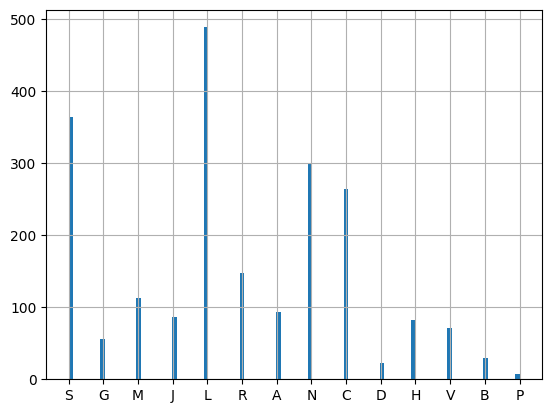

In [8]:
# plot de distribution of ther_area and include the nan values
# train.ther_area.hist(bins=100)
train[["country", "brand", "ther_area"]].drop_duplicates().ther_area.hist(bins=100)


## main_channel

In [9]:
# group by brand and country and number of unique main_channel
train.groupby(["brand", "country"]).main_channel.nunique().sort_values(ascending=False)


brand  country   
ABRRE  Arrakis       1
QGTFP  Asgard        1
PUHXP  Fangorn       1
       Gondor        1
       Hogwarts      1
                    ..
RWUKW  Prydain       0
       Qarth         0
       Themyscira    0
       Vulcan        0
ZVLFE  Zamunda       0
Name: main_channel, Length: 2684, dtype: int64

<Axes: >

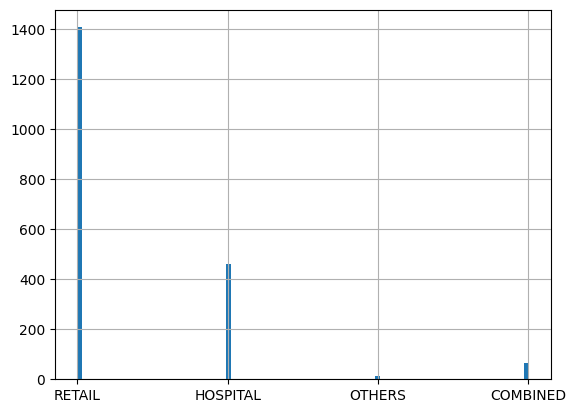

In [10]:
# plot de distribution of main_channel and include the nan values
# train.main_channel.hist(bins=100)
train[["country", "brand", "main_channel"]].drop_duplicates().main_channel.hist(
    bins=100
)


In [11]:
# count nan values
train.isna().sum()


brand                 0
phase                 0
country               0
dayweek               0
month                 0
wd_perc               0
ther_area        356445
hospital_rate    504994
n_nwd_bef             0
n_nwd_aft             0
n_weekday_0           0
n_weekday_1           0
n_weekday_2           0
n_weekday_3           0
n_weekday_4           0
date                  0
wd                    0
wd_left               0
monthly               0
main_channel     504994
dtype: int64

Cuando no tienes información de los canales, no sabes el porcentaje que corresponde con hospital.
Rellenarlo a 0 igual es un error.

In [12]:
# average hospital_rate by main_channel
train.groupby("main_channel", observed=True)["hospital_rate"].mean()


main_channel
COMBINED    0.000000
HOSPITAL    0.910864
OTHERS      0.173619
RETAIL      0.055706
Name: hospital_rate, dtype: float64

In [13]:
# countries with nan in main_channel
train[train["hospital_rate"].isna()]["country"].nunique()
test[test["hospital_rate"].isna()]["brand"].nunique()


44

In [14]:
# group by brand and count the number of nan and another column with the number of not nan values
temp = (
    train.groupby(["country", "brand"])["main_channel"]
    .agg([lambda x: x.isna().sum(), lambda x: x.notna().sum()])
    .reset_index()
    .rename(columns={"<lambda_0>": "nan", "<lambda_1>": "not_nan"})
    .sort_values(by=["nan", "not_nan"], ascending=[False, True])
)
# filter if not_nan is == 0
temp[(temp["not_nan"] != 0) & (temp["nan"] != 0)]


,country,brand,nan,not_nan


Las series de country brand son estables a nivel de NaN

<Axes: xlabel='wd_perc_bins', ylabel='phase'>

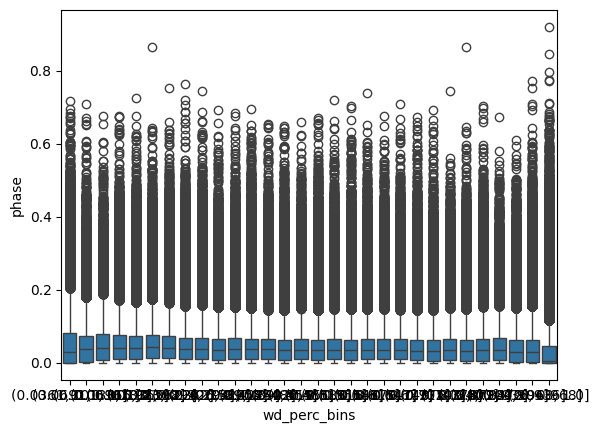

In [15]:
# plot wd_perc vs phase, boxplot with seaborn
# group the wd_prec in 30 bins
train["wd_perc_bins"] = pd.cut(train["wd_perc"], bins=30)
train.groupby("wd_perc_bins", observed=True)["phase"].mean()

# plot
sns.boxplot(x="wd_perc_bins", y="phase", data=train)


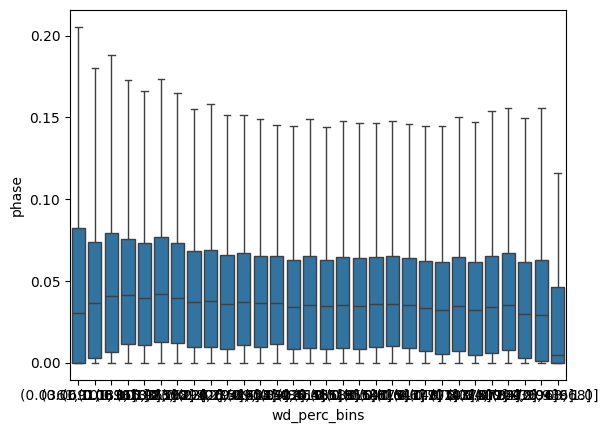

In [16]:
# plot wd_perc vs phase, boxplot with seaborn
# group the wd_prec in 30 bins
train["wd_perc_bins"] = pd.cut(train["wd_perc"], bins=30)
train.groupby("wd_perc_bins", observed=True)["phase"].mean()

# plot
_ = sns.boxplot(x="wd_perc_bins", y="phase", data=train, showfliers=False)


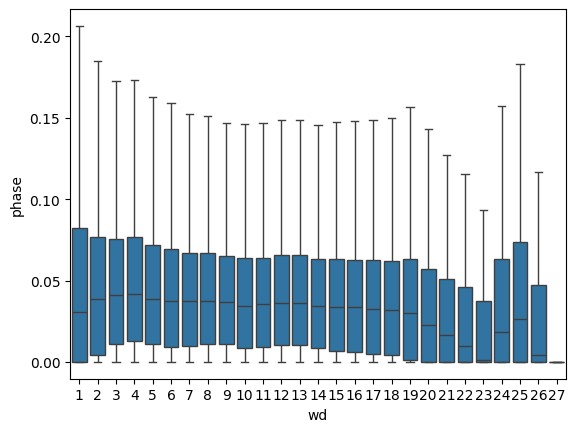

In [17]:
_ = sns.boxplot(x="wd", y="phase", data=train, showfliers=False)


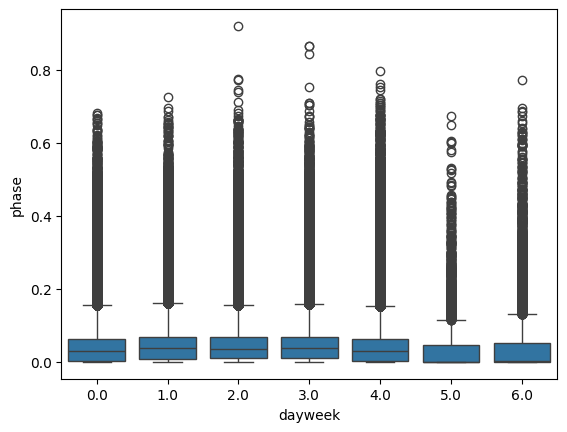

In [18]:
_ = sns.boxplot(x="dayweek", y="phase", data=train)


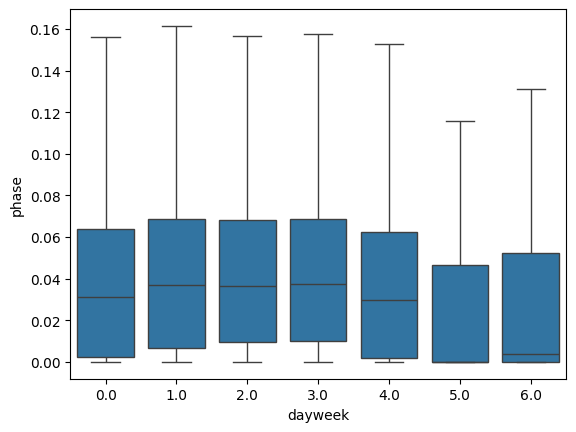

In [19]:
_ = sns.boxplot(x="dayweek", y="phase", data=train, showfliers=False)


# phase > 1 

In [20]:
# is there any case of phase > 1 in train?
print(f"Is there any case of phase > 1 in train? {train[train.phase > 1].shape[0] > 0}")


Is there any case of phase > 1 in train? False


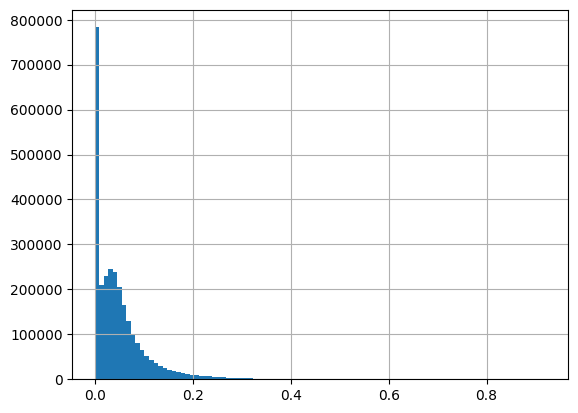

In [21]:
# train phase distribution
_ = train.phase.hist(bins=100)


redimensionar con la funcion para que tenga la misma forma la distribución
early stooping


In [22]:
import numpy as np

# Your series of data
data = [2, 4, 6, 8]

# Convert the data to a NumPy array for easier manipulation
data_array = np.array(data)

# Calculate the sum of the data
sum_data = np.sum(data_array)

# Normalize the data
normalized_data = data_array / sum_data

# Print the normalized data
print(normalized_data)
print(sum(normalized_data))


[0.1 0.2 0.3 0.4]
1.0


# outliers

In [23]:
train["year"] = train.date.dt.year


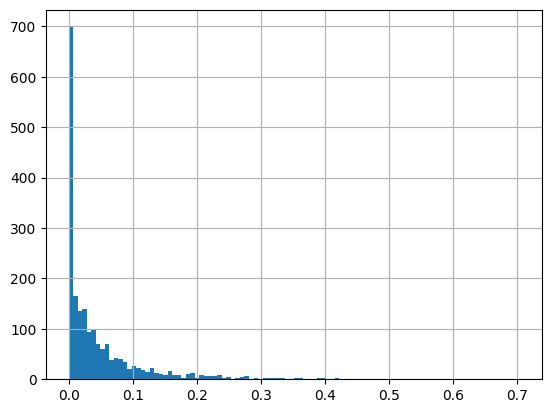

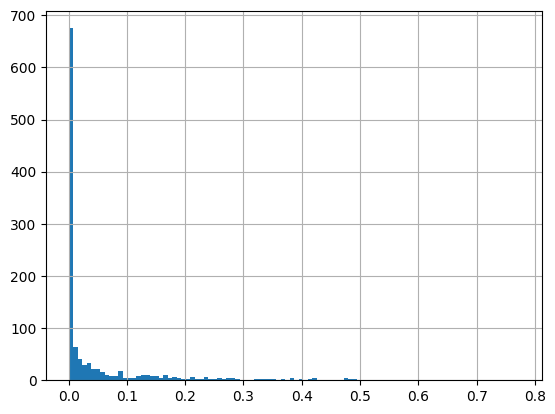

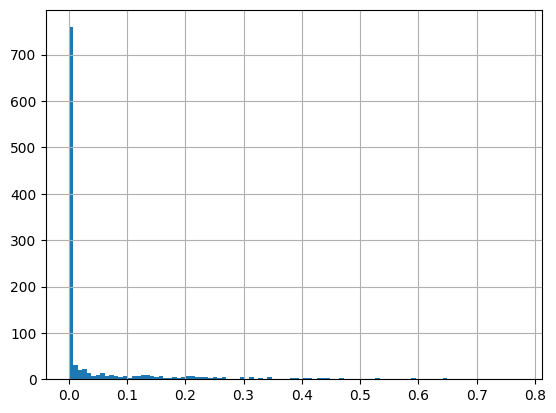

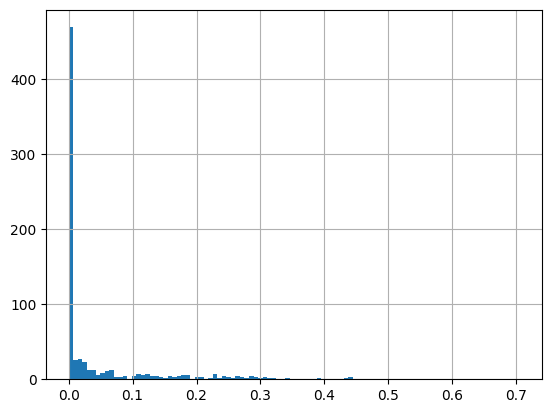

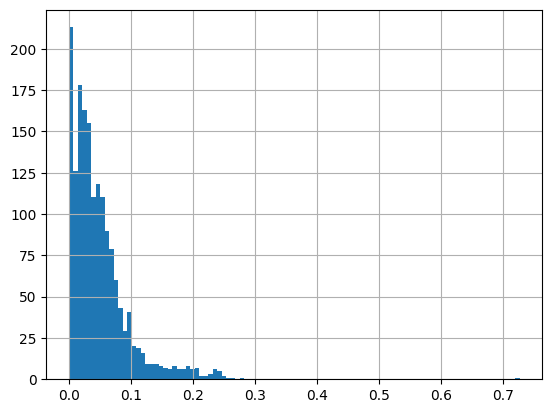

In [24]:
# fuction that plot a random group of brand and country and month that have phase > 0.6
import matplotlib.pyplot as plt


def plot_random_group(df, min_phase=0.0, n=1):
    # get a random group of brand and country that have phase > 0.6
    temp = df[(df.phase > min_phase)].sample(n)
    # plot
    # take the month and year of the first row
    for i in range(n):
        month = temp.iloc[i].month
        year = temp.iloc[i].year
        # plot from df the data from the same month and year, brand and country
        temp2 = df[
            #   (df.month == month)
            #   & (df.year == year)
            1 & (df.brand == temp.iloc[i].brand) & (df.country == temp.iloc[i].country)
        ]
        # plot
        # plot the phase

        # plt.plot(temp2.wd, temp2.phase)
        # plt.show()
        # plot the hist of phase
        temp2[temp2["phase"] >= 0].phase.hist(bins=100)
        plt.show()


plot_random_group(train, 0.7, 5)


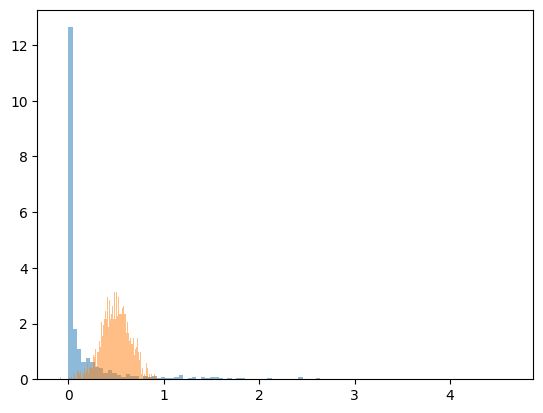

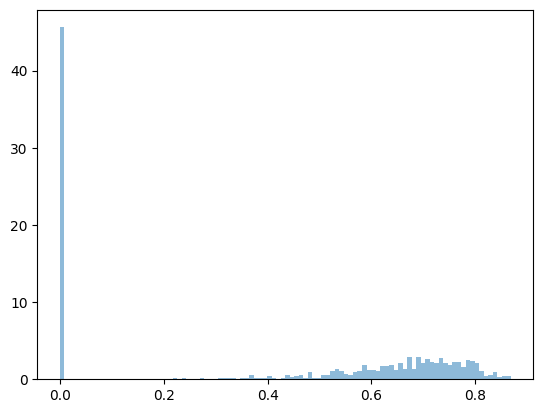

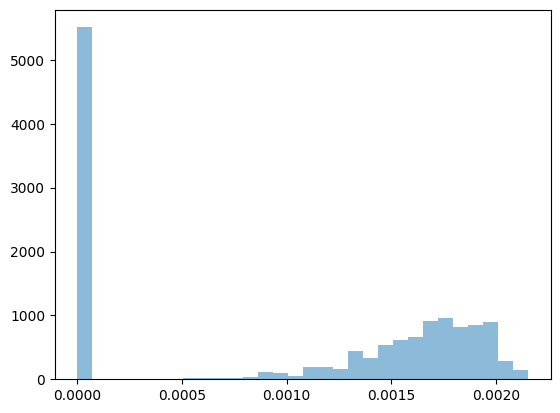

Sum of the first series: 206.65649481519802
Sum of the normalized second series: 1.0


In [25]:
import numpy as np
from scipy.stats import norm
from scipy.stats import gamma

# Step 1: Fit a distribution to the first series
first_series = np.random.gamma(shape=0.2, scale=1, size=1000)  # Example data
params = norm.fit(first_series)
plt.hist(first_series, bins=100, density=True, alpha=0.5, label="Transformed Data")
# Step 2: Transform the second series
second_series = np.random.normal(loc=0.5, scale=0.15, size=1000)  # Example data
plt.hist(second_series, bins=100, density=True, alpha=0.5, label="Transformed Data2")
plt.show()
transformed_second_series = gamma.cdf(second_series, *params)
plt.hist(
    transformed_second_series,
    bins=100,
    density=True,
    alpha=0.5,
    label="Transformed Data2",
)
plt.show()
# Step 3: Normalize the transformed series
normalized_series = transformed_second_series / np.sum(transformed_second_series)
plt.show()
plt.hist(normalized_series, bins=30, density=True, alpha=0.5, label="Transformed Data3")
plt.show()
# Print the results
print("Sum of the first series:", np.sum(first_series))
print("Sum of the normalized second series:", np.sum(normalized_series))


In [26]:
max(normalized_series)


0.002155664125747601

# Historico

In [27]:
test["country_brand"] = test["country"] + test["brand"]
train["country_brand"] = train["country"] + train["brand"]
# filter train by country_brand in test
train_filtered = train[train.country_brand.isin(test.country_brand.unique())]
# concat
df = pd.concat([train_filtered, test])


,brand,country,days
years,,,
0.060274,0.000373,0.000373,0.000373
0.065753,0.000373,0.000373,0.000373
0.071233,0.000745,0.000745,0.000745
0.073973,0.001490,0.001490,0.001490
0.076712,0.002981,0.002981,0.002981
...,...,...,...
8.986301,0.005589,0.005589,0.005589
8.989041,0.011177,0.011177,0.011177
8.994521,0.003726,0.003726,0.003726


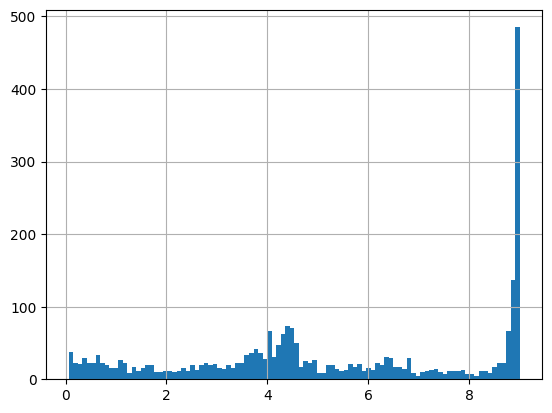

In [28]:
# group by brand and country and calculate the diference between the max and min date
df = train
temp = (
    df.groupby(["brand", "country"])["date"]
    .agg([lambda x: x.max() - x.min()])
    .reset_index()
    .rename(columns={"<lambda>": "days"})
    .sort_values(by=["days"], ascending=[False])
)
# column days to years
temp["years"] = temp.days.dt.days / 365
# plot the distribution of years
temp.years.hist(bins=100)
# round years
# temp["years"] = temp.years.round()
temp.groupby("years").count() / temp.groupby("years").count().sum()


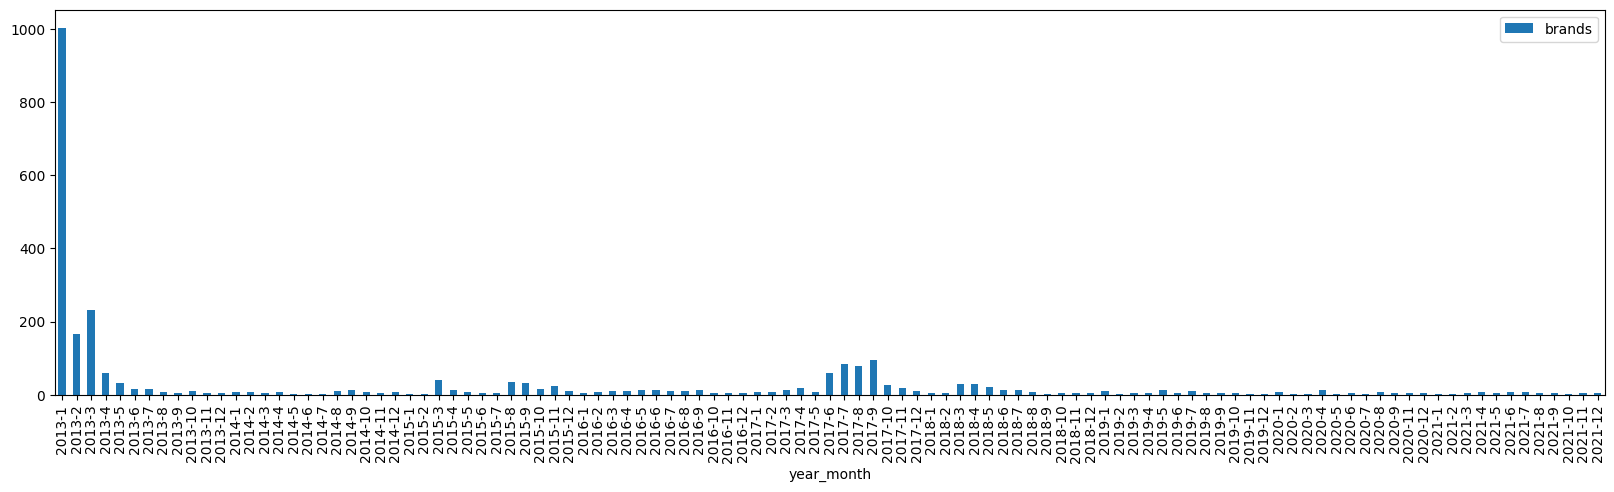

In [30]:
# group by brand and country and calculate the diference between the max and min date
df = train
temp = (
    df.groupby(["brand", "country"])["date"]
    .agg([lambda x: x.min()])
    .reset_index()
    .rename(columns={"<lambda>": "date"})
    .sort_values(by=["date"], ascending=[False])
)
temp = temp[["brand", "date"]]
temp["year"] = temp.date.dt.year
temp["month"] = temp.date.dt.month
# group by the year and month and count the number of brands and country
temp = (
    temp.groupby(["year", "month"])
    .count()
    .reset_index()
    .drop(columns=["date"])
    .rename(columns={"brand": "brands"})
    .sort_values(by=["year", "month"])
)
# joint the year and month
temp["year_month"] = temp["year"].astype(str) + "-" + temp["month"].astype(str)
# plot year_month vs brands
_ = temp.plot(x="year_month", y="brands", kind="bar", figsize=(20, 5))
